In [14]:
import emcee
import corner
import speclite as speclite; from speclite import filters
from tqdm import tqdm
from matplotlib import cm
from matplotlib.artist import Artist
from chromatic import *
from scipy.optimize import minimize
from scipy.optimize import curve_fit
from PyAstronomy import pyasl
from specutils.spectra import Spectrum1D, SpectralRegion
from specutils.fitting import fit_generic_continuum

plt.rcParams['lines.linewidth']   =3
plt.rcParams['axes.linewidth']    = 2
plt.rcParams['xtick.major.width'] =2
plt.rcParams['ytick.major.width'] =2
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['legend.numpoints'] = 1
plt.rcParams['axes.labelweight']='semibold'
plt.rcParams['mathtext.fontset']='stix'
plt.rcParams['font.weight'] = 'semibold'
plt.rcParams['axes.titleweight']='semibold'
plt.rcParams['axes.titlesize']=9

In [15]:
NRES_Spectra = {
    
    "F21" : {
        
        "53" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "54" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "55" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "56" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "57" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "58" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "59" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "60" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "61" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "62" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "63" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "64" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "65" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "66" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "67" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "68" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "69" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "70" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "71" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "72" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "73" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "74" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "75" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "76" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "77" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "78" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "79" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "80" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "81" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "82" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "83" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        }   
    },
    
    "S22" : {
        "53" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "54" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "55" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "56" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "57" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "58" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "59" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "60" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "61" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "62" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "63" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "64" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "65" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "66" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "67" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "68" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "69" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "70" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "71" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "72" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "73" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "74" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "75" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "76" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "77" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "78" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "79" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "80" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "81" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "82" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        },
        "83" : {
            "w" : None,"f" : None,"e" : None, "ref_w" : None,
        }   
    }
}

## Spectrum normalization functions

In [16]:
def normalize_nres(data_flux,wavelength=None,**kwargs):
    
    flux = data_flux * u.erg
    
    _m = flux/np.nanmedian(flux)
    spectrum = Spectrum1D(flux=_m, spectral_axis=wavelength)
    with warnings.catch_warnings():  # Ignore warnings
        warnings.simplefilter('ignore')
        g1_fit = fit_generic_continuum(spectrum)
        continuum_fit = g1_fit(wavelength)
        
    normed_flux = _m/continuum_fit
    
    return normed_flux

In [17]:
def normalized_1T_PHOENIX(Tspec=3900,wavelength=None,**kwargs):
        
    _model = get_phoenix_photons(temperature=float(Tspec),wavelength=wavelength,
                                 logg=4.52, metallicity=0.0)
    
    _m = _model[1]/np.nanmedian(_model[1])
    spectrum = Spectrum1D(flux=_m, spectral_axis=_model[0])
    with warnings.catch_warnings():  # Ignore warnings
        warnings.simplefilter('ignore')
        g1_fit = fit_generic_continuum(spectrum)
        continuum_fit = g1_fit(_model[0])
        
    normed_model = _m/continuum_fit
    
    return normed_model

In [18]:
def normalized_3T_PHOENIX(spot_params=[0.02,0.02,0.3,0.3,8000,3000.,3800.],w1=None,w2=None, **kwargs):
    
    f_hot_21,f_hot_22,f_cool_21,f_cool_22,T_hot,T_cool,T_mid = spot_params
    f_mid_21 = 1.0 - (f_hot_21 + f_cool_21)
    f_mid_22 = 1.0 - (f_hot_22 + f_cool_22)
    
    S_hot_21 = get_phoenix_photons(temperature=int(spot_params[4]),wavelength=w1,
                                   logg=4.52,metallicity=0.0)
    S_cool_21 = get_phoenix_photons(temperature=int(spot_params[5]),wavelength=w1,
                                    logg=4.52,metallicity=0.0)
    S_mid_21 = get_phoenix_photons(temperature=int(spot_params[6]),wavelength=w1,
                                   logg=4.52,metallicity=0.0)
    
    S_hot_22 = get_phoenix_photons(temperature=int(spot_params[4]),wavelength=w2,
                                   logg=4.52,metallicity=0.0)
    S_cool_22 = get_phoenix_photons(temperature=int(spot_params[5]),wavelength=w2,
                                    logg=4.52,metallicity=0.0)
    S_mid_22 = get_phoenix_photons(temperature=int(spot_params[6]),wavelength=w2,
                                   logg=4.52,metallicity=0.0)
    
    _m = f_hot_21*S_hot_21[1] + f_cool_21*S_cool_21[1] + f_mid_21*S_mid_21[1]
    normed_spec = _m/np.nanmedian(_m)
    spectrum = Spectrum1D(flux=normed_spec, spectral_axis=S_hot_21[0])
    with warnings.catch_warnings():  # Ignore warnings
        warnings.simplefilter('ignore')
        g1_fit = fit_generic_continuum(spectrum)
        continuum_fit = g1_fit(S_hot_21[0])
    model21 = normed_spec/continuum_fit
    
    _m = f_hot_22*S_hot_22[1] + f_cool_22*S_cool_22[1] + f_mid_22*S_mid_22[1]
    normed_spec = _m/np.nanmedian(_m)
    spectrum = Spectrum1D(flux=normed_spec, spectral_axis=S_hot_22[0])
    with warnings.catch_warnings():  # Ignore warnings
        warnings.simplefilter('ignore')
        g1_fit = fit_generic_continuum(spectrum)
        continuum_fit = g1_fit(S_hot_22[0])
    model22 = normed_spec/continuum_fit
    
    return model21,model22

## Spectral model

In [19]:
def avg_3T_spec_model(parameters=[0.02,0.02,0.3,0.3,8000,3000.,3800.],w1=None,
                      w2=None,f1=None,f2=None,e1=None,e2=None,
                      plot=False,ref_w=None,
                      samples_exist=False,samples=None,
                      label=None,title=None,**kwargs):
    
    model21,model22 = normalized_3T_PHOENIX(spot_params=parameters,w1=w1,w2=w2)
    
    for i in range(len(model21)-1):
        if w1[i+1]-w1[i] >= 0.0002*u.micron:
            model21[i] = np.nan
            model21[i+1] = np.nan
            
    for i in range(len(model22)-1):
        if w2[i+1]-w2[i] >= 0.0002*u.micron:
            model22[i] = np.nan
            model22[i+1] = np.nan
    
    chisq = np.nansum((f1-model21)**2/(e1**2))
    err_weight = np.nansum(1./np.sqrt(2.*np.pi*(e1)))
    ln_like_21 = (err_weight - 0.5*chisq)
    
    chisq = np.nansum((f2-model22)**2/(e2**2))
    err_weight = np.nansum(1./np.sqrt(2.*np.pi*(e2)))
    ln_like_22 = (err_weight - 0.5*chisq)
    
    ln_like = ln_like_21+ln_like_22
    
    if plot:
        fig, [ax0,ax1] = plt.subplots(2,1,figsize=(6,3),sharex=True,gridspec_kw=dict(height_ratios=[1,0.3]))
        # fig.suptitle(f'{title}',fontsize=20)

        # Top plot, the processed data and combined model
        ax0.plot(w1, model21,color='k',zorder=100)
        ax0.plot(w2, model22-0.5,color='green',zorder=100)
        ax0.errorbar(w1, f1, yerr=e1, zorder=-100,
                     color='teal',label='F21 Avg. Spectrum',fmt='',alpha=1)
        ax0.errorbar(w2, f2-0.5, yerr=e2, zorder=-100,
                     color='teal',label='S22 Avg. Spectrum',fmt='',alpha=1)
        # ax0.set_ylim(0.4,1.3)
        ax0.set_ylabel('Rel. Flux',fontsize=9)
        ax0.legend(loc='upper right',fontsize=9)
        # The middle plot, residuals of the above data and model
        ax1.errorbar(w1,(f1-model21)/(e1),
                     yerr=1,zorder=100,color='gray',alpha=0.5)
        ax1.errorbar(w2,(f2-model22)/(e2),
                     yerr=1,zorder=100)
        ax1.set_ylabel(r'$\sigma$',fontsize=10)
        ax1.set_xlabel(r'$\lambda$ ($\mu$m)',fontsize=9,color='green',alpha=0.5)
        ax1.set_ylim(-4,4)
        # ax1.legend(loc='lower right')
        # ax1.axhspan(-1,1,color='red',alpha=0.2,zorder=10)
        # ax1.axhspan(-2,2,color='green',alpha=0.2,zorder=0)
        # ax1.axhspan(-3,3,color='gray',alpha=0.3,zorder=-10)
        # ax1.set_xlim(ref_w[0],ref_w[-1])
        ax1.axhline(0)

#         if samples_exist:
#             fhot_sam, fcool_sam, Thot_sam, Tcool_sam, Tmid_sam = samples  
#             for k in range(0,500):
#                 i = np.random.randint(low=0,high=(len(Tamb_sam)-1))
                
#                 parameters = [fhot_sam[i], fcool_sam[i], Thot_sam[i], Tcool_sam[i], Tmid_sam[i]]
                
#                 S_hot = get_phoenix_photons(temperature=int(parameters[2]),wavelength=wavelength,
#                                    logg=4.52,metallicity=0.0)
#                 S_cool = get_phoenix_photons(temperature=int(parameters[3]),wavelength=wavelength,
#                                                 logg=4.52,metallicity=0.0)
#                 S_mid = get_phoenix_photons(temperature=int(parameters[4]),wavelength=wavelength,
#                                                logg=4.52,metallicity=0.0)

#                 _model = normalized_3T_PHOENIX(spot_params=parameters,wavelength = wavelength,
#                                   hotspec=S_hot,coolspec=S_cool,ambspec=S_mid)

#                 for i in range(len(_model)-1):
#                     if wavelength[i+1]-wavelength[i] >= 0.0002*u.micron:
#                         _model[i] = np.nan
#                         _model[i+1] = np.nan
#                 ax0.plot(wavelength, _model, zorder=10, alpha=0.02, color='firebrick')

        plt.tight_layout()
        plt.savefig(f'../figs/{label}_specmodel.png',dpi=200)
        plt.show()
        plt.close()
    
    return model21, model22, ln_like

## Make a dictionary of spectra

In [ ]:
# good_orders = np.array([53,54,55,60,61,62,69, 
#                         70,71,72,73,75,76,77,
#                         80,81,82,83])

good_orders = np.array([53,54,55,60,61,69, 
                        70,71,72,75,76,77,
                        80,81,82,83])

for visit in tqdm(['F21','S22']):
    for order in tqdm(good_orders):
        _r = read_rainbow(f"../data/rainbows/{visit}_{order}_clipped.rainbow.npy")
        _r = _r.bin(dw=0.05*u.nm)
        _ref_r = read_rainbow(f"../data/rainbows/{visit}_{order}_original.rainbow.npy")
        ref_r = _ref_r.trim()
        ref_w = ref_r.wavelength.value
        data_wave = _r.wavelength
        _1dspec = _r.get_average_spectrum()
        nres_avg_1dspec = normalize_nres(_1dspec, wavelength=data_wave)
        nres_avg_1derr = np.nanmedian(_r.uncertainty,axis=1)/np.sqrt(len(_r.timelike['time']))
        template_spec = normalized_1T_PHOENIX(Tspec=3650,wavelength=data_wave)
        rchisq = np.nansum((template_spec-nres_avg_1dspec)**2/(nres_avg_1derr)**2) / (len(data_wave)-1)
        if rchisq > 1.0:
            nres_avg_1derr = nres_avg_1derr * np.sqrt(rchisq)
            
        NRES_Spectra[f'{visit}'][f'{order}']['w'] = data_wave
        NRES_Spectra[f'{visit}'][f'{order}']['ref_w'] = ref_w
        NRES_Spectra[f'{visit}'][f'{order}']['f'] = nres_avg_1dspec
        NRES_Spectra[f'{visit}'][f'{order}']['e'] = nres_avg_1derr*1.25

## Run Teff + Spec Model

after this, go back to modeling the visits separately with the simpler moel

In [39]:
reader = emcee.backends.HDFBackend(f'../data/samples/Combined_3T_Spec_1500steps.h5')
sampler = reader.get_chain(discard=int(0.25*312), flat=True)
ensemblesamples = sampler.reshape((-1, 5)).T

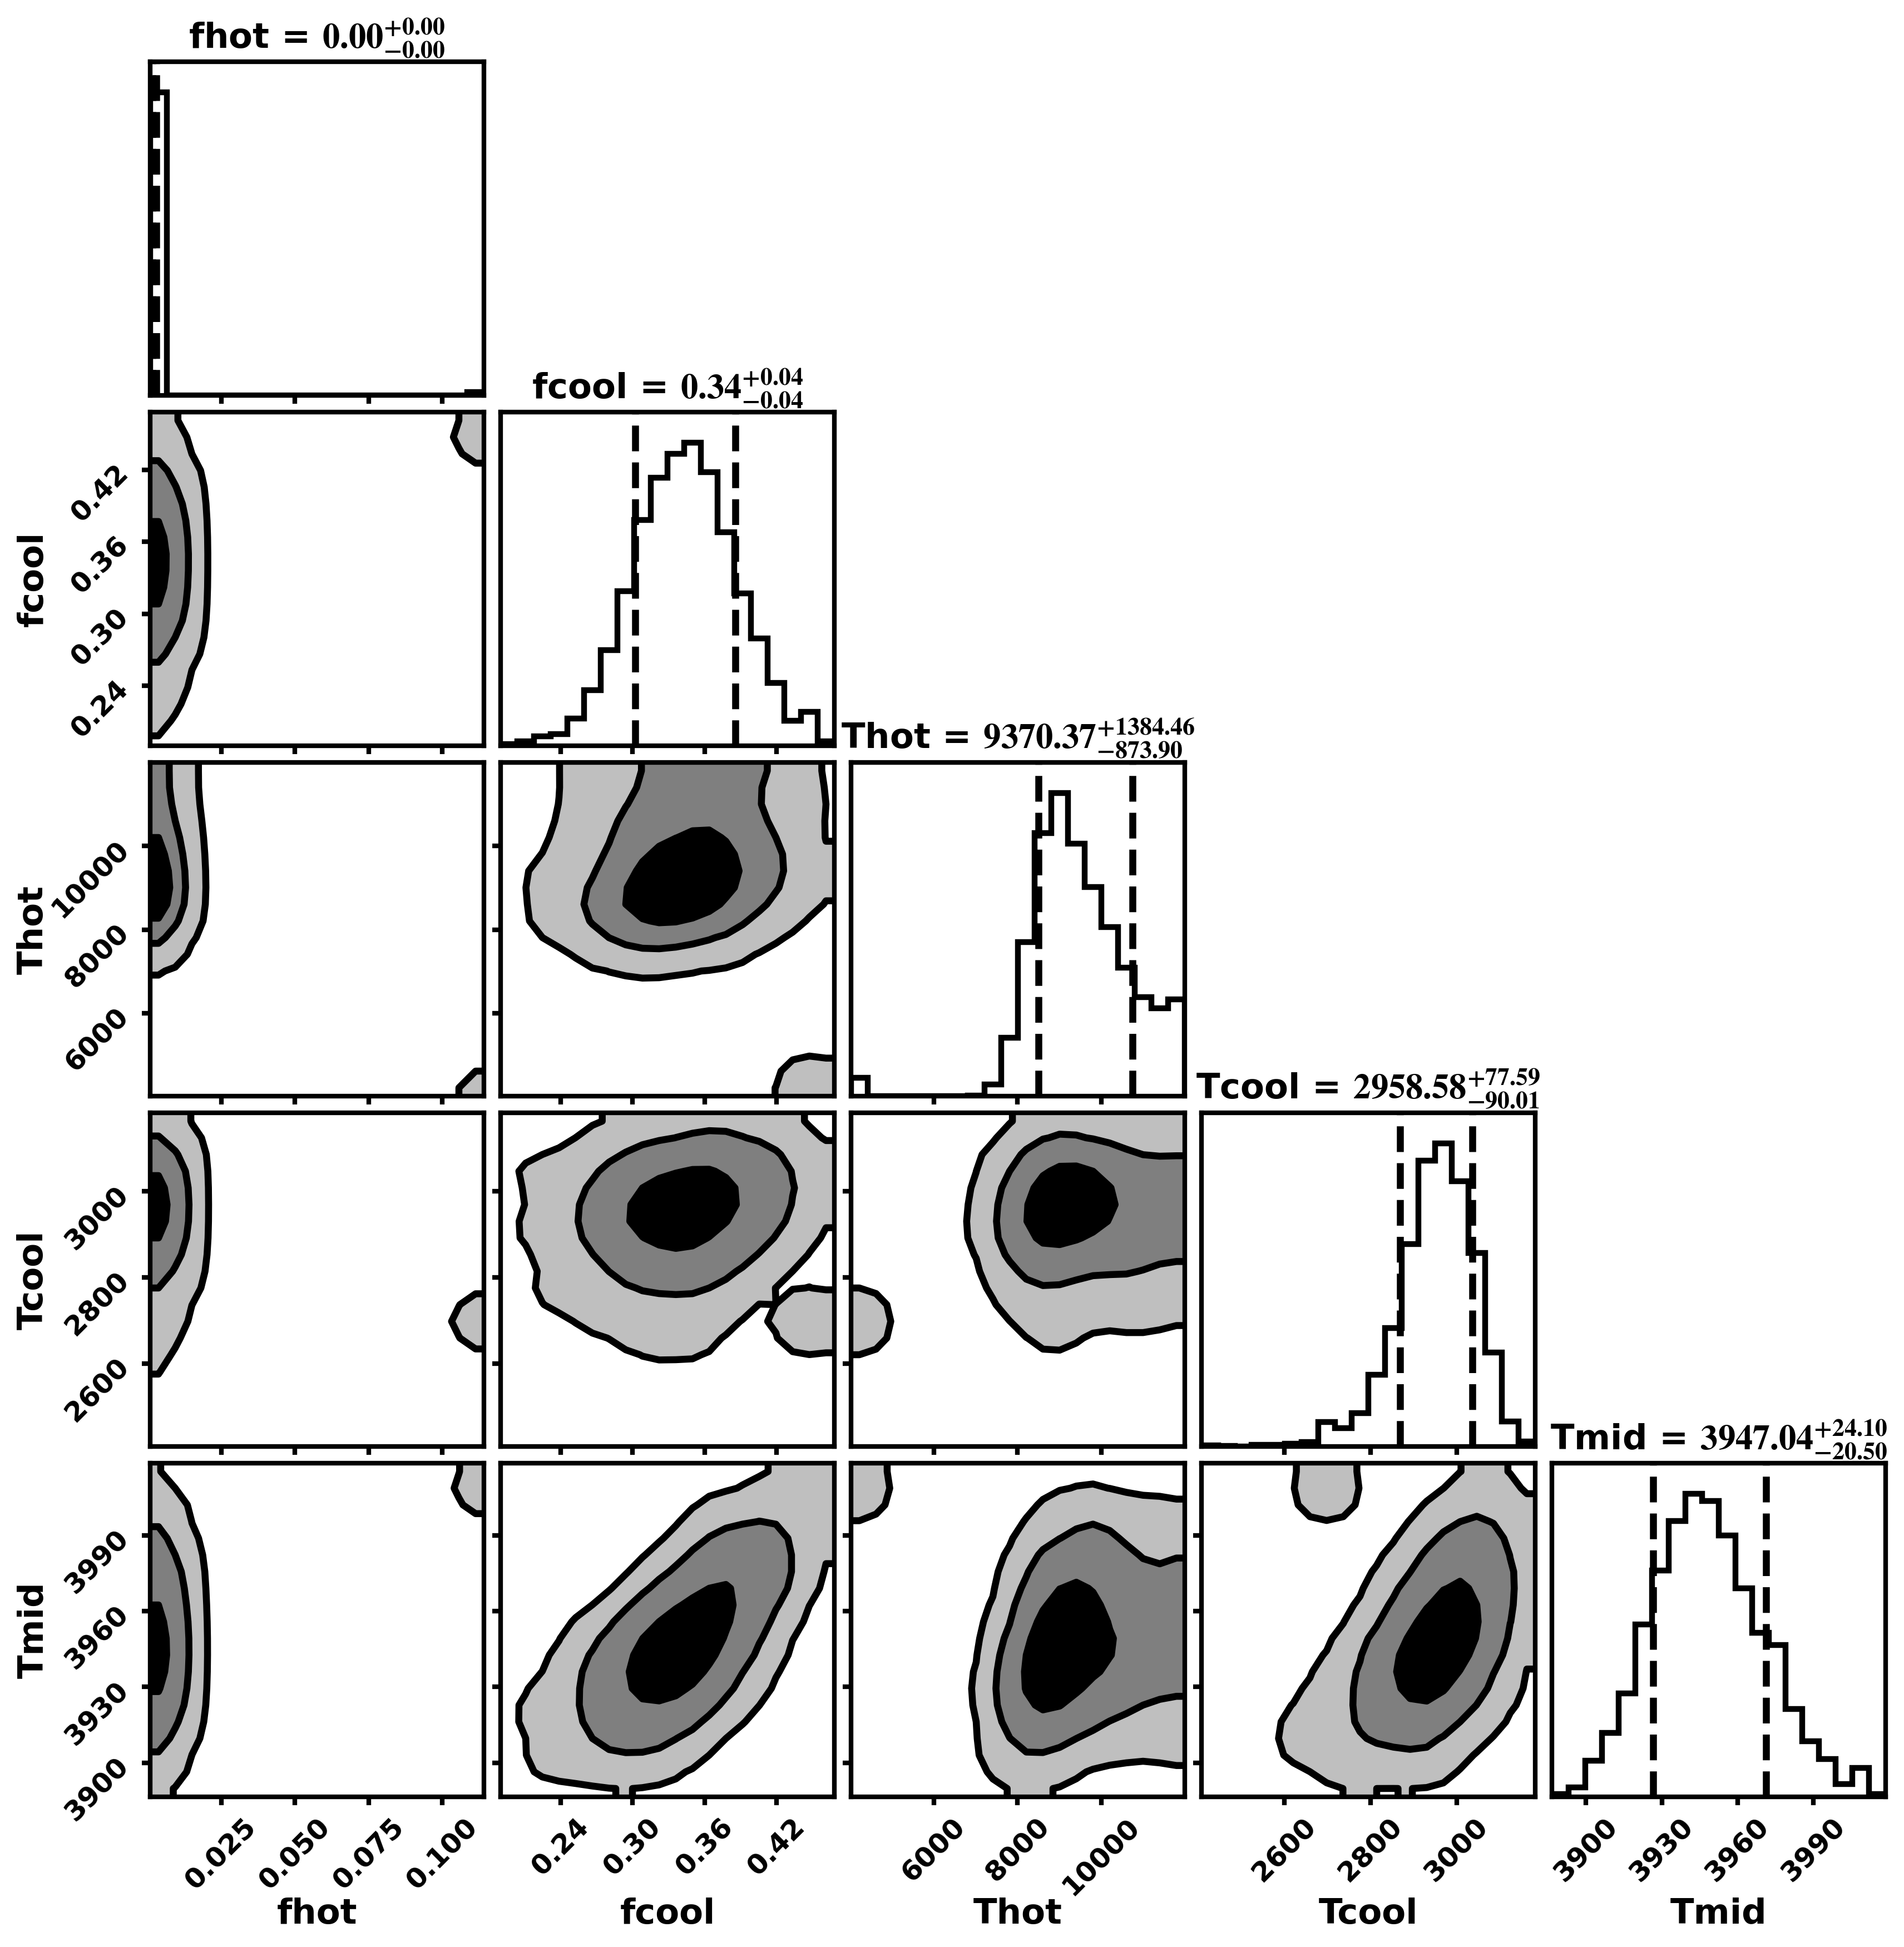

In [40]:
label = 'Combined_3T_Spec_312steps'
rng = 0.9995
fig = corner.corner( 
    ensemblesamples.T,show_titles=True, labels=['fhot','fcool','Thot','Tcool','Tmid'],
    range=[rng,rng,rng,rng,rng],
    smooth=1,quantiles=(0.16, 0.84),
    fill_contours=True, plot_datapoints=False,title_kwargs={"fontsize": 15},title_fmt='.2f',
    hist_kwargs={"linewidth": 2.5},levels=[(1-np.exp(-0.5)),(1-np.exp(-2)),(1-np.exp(-4.5))]
)
plt.savefig(f'../figs/{label}_corner.png',dpi=200)
plt.show()
plt.close()